# Multiclass classification with the Iris dataset

The Iris dataset consists of 3 different classes of irises (Setosa, Versicolour, and Virginica). Each iris is described by four features: Sepal Length, Sepal Width, Petal Length and Petal Width. 

The objective of this exercice is to train a multiclass classification model using the [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model available in `scikit-learn`.

## Initialisation

Load the following libraries.

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Question 1: Data exploration

Load the Iris dataset (run the cell below). The dataset contains 150 examples, stored in 150x4 numpy array. The rows being the samples and the columns being the features. As there are 3 classes of irises, each example corresponds to a target value: `0 = setosa, 1 = versicolor, 2 = virginica`.

In [12]:
# Load Iris dataset
iris = datasets.load_iris()

# data
X = iris.data   # features
t = iris.target # target

# description
feature_names = iris.feature_names
species = iris.target_names

print("Iris species:", species)
print("Features name:",feature_names)


Iris species: ['setosa' 'versicolor' 'virginica']
Features name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Explore the data

1. Make a histogram of each feature of the data. On each figure represent with a different color the 3 classes of Iris.
2. Show the scatter plots of each feature versus a different feature, again using a different color for each classes (you should make 6 figures in total).

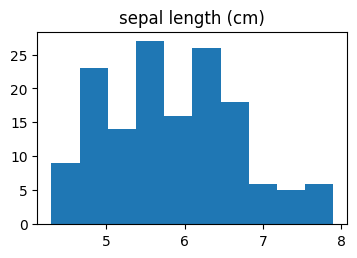

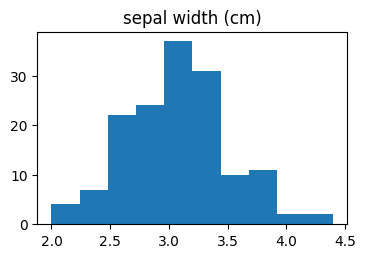

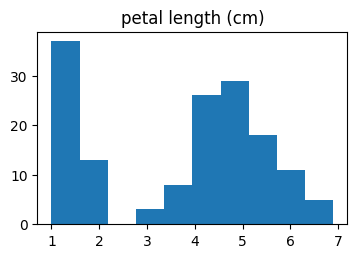

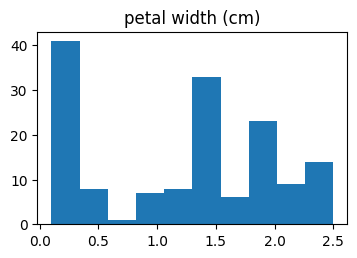

In [42]:
for j in range(4) :
    plt.figure(figsize=(4,2.5))
    plt.hist(X[:,j])
    plt.title(f'{feature_names[j]}');

## Question 2: Train model and predict

1. Using the `train_test_split` method to split the dataset as follow: 2 third of the total sample size for training and 1 third for testing.

2. Initialize the logistic regression model (described here [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) with the following parameters:

  `model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)`
  
  Describe, briefly, the meaning of all the parameters of this function.

3. Train the model on the training set. Display the values of the weights and the bias terms.

4. Predict the class label for all samples in the training and test datasets. Give the accuracy of the prediction for both samples. Comment on the results.

5. For each class show a histogram of the probability estimate `predict_proba` of being in the right class. 

model accuracy on training set : 0.96
model accuracy on testing set : 1.0
Matrix of weights : [[ 0.85580969 -2.24399068 -0.95264595]
 [-0.36121729 -0.12421185 -0.77248212]
 [-0.4945924   2.36820253  1.72512807]]
Biais : [-0.39002462  0.43967671 -0.04965209]


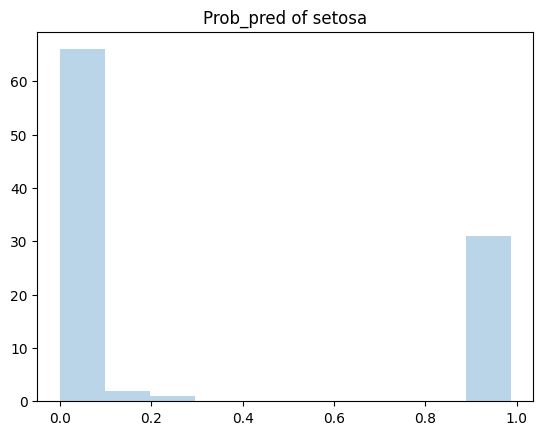

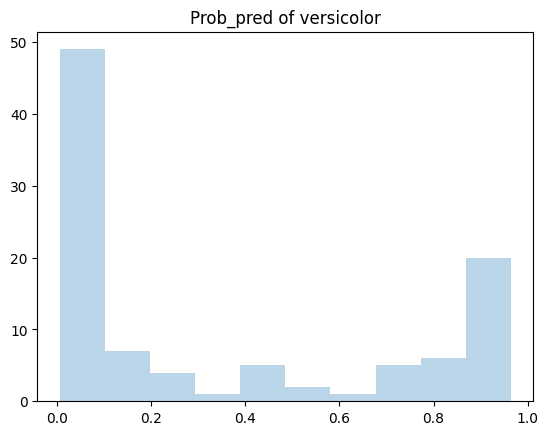

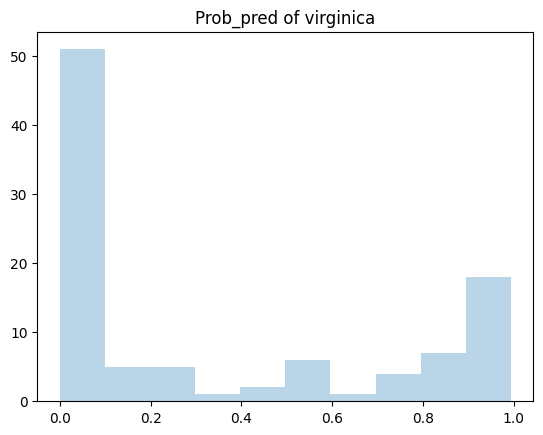

In [71]:
X_train, X_test, t_train, t_test = train_test_split(X,t, train_size = 2/3, random_state = 42)
model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)
model.fit(X_train,t_train)
model.predict(X_train)
print('model accuracy on training set :', model.score(X_train,t_train))
print('model accuracy on testing set :', model.score(X_test,t_test))
Prob_pred_train = model.predict_proba(X_train)
print('Matrix of weights :',model.coef_[:,1:])
print('Biais :',model.coef_[:,0])
for i in range(3):
    plt.figure()
    plt.hist(Prob_pred_train[:,i], stacked=True, alpha=0.3)
    plt.title(f'Prob_pred of {species[i]}')

## Question 3: Explain how probability is calculated

1. Explain how the probability estimate `predict_proba` is computed. Redo the calculation of this probability on the test dataset by using **only** `numpy` tools. What are the differences with respect to the logistic regression method seen in the lecture and in the hands-on session ?

2. Explain how the predicted class (the calculated class label) is determined for each example ?

## Question 4: Plot decision surfaces (optional)

Show the decision surfaces on the scatter plots of each feature versus another (question 1.2), with different color for each classes.

***